In [16]:
from sklearn import datasets
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import roc_auc_score
from scipy.spatial.distance import euclidean
from functools import reduce
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import r2_score
from scipy.stats import logistic
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

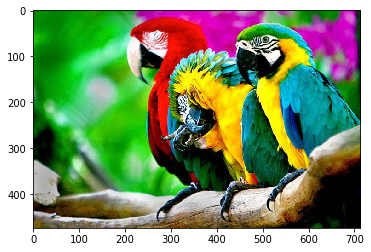

In [5]:
image = imread('parrots.jpg')
pylab.imshow(image)

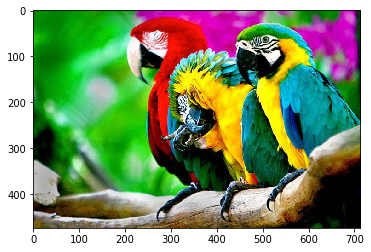

In [9]:
new_image = img_as_float(image)
pylab.imshow(new_image)

In [14]:
w, h, d =new_image.shape
df = pd.DataFrame(np.reshape(new_image, (w * h, d)), columns=['R', 'G', 'B'])
df.head()

,R,G,B
0,0.011765,0.490196,0.015686
1,0.011765,0.490196,0.015686
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


In [15]:
df.shape

(337962, 3)

In [35]:
def psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return 10 * math.log10(float(1) / mse)

In [36]:
def cluster(pixels, n_clusters):
    print(f"Clustering: {n_clusters}")

    pixels = pixels.copy()
    model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
    pixels['cluster'] = model.fit_predict(pixels)

    means = pixels.groupby('cluster').mean().values
    mean_pixels = [means[c] for c in pixels['cluster'].values]
    mean_image = np.reshape(mean_pixels, (w, h, d))

    medians = pixels.groupby('cluster').median().values
    median_pixels = [medians[c] for c in pixels['cluster'].values]
    median_image = np.reshape(median_pixels, (w, h, d))

    return mean_image, median_image



In [34]:
for n in range(1, 21):
    mean_image, median_image = cluster(df, n)
    psnr_mean, psnr_median = psnr(new_image, mean_image), psnr(new_image, median_image)
    print(psnr_mean, psnr_median)

    if psnr_mean > 20 or psnr_median > 20:
        print(n)
        with open("kmean_res.txt", "w") as f:
            print(n, file=f, end='')
        break

Clustering: 1
9.866444484956007 9.503496928816002
Clustering: 2
12.145066235051845 11.722015723732774
Clustering: 3
13.208147194858595 12.688439208922432
Clustering: 4
14.41637031290048 14.053185656839775
Clustering: 5
15.590897391155137 15.25486300995161
Clustering: 6
16.606672141281532 16.11594987284873
Clustering: 7
17.69899904251378 17.399408391222035
Clustering: 8
18.484638841200116 18.18352651043233
Clustering: 9
19.166906963017418 18.879476945682665
Clustering: 10
19.696840128399 19.470495715916737
Clustering: 11
20.183423214034132 19.903748580738537
11
